In [3]:
from bellman_ford.bellman_ford import bf_negative_cycle
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import time
import pandas as pd
from datetime import datetime

In [6]:
def plot_grapg(grafo, title):
    pos = nx.spring_layout(grafo,k=8)

    nx.draw(grafo, pos, with_labels=True)
    nx.draw_networkx_edge_labels(grafo,
                                 pos,
                                 edge_labels={(u, v): d for u, v, d in grafo.edges(data="weight")},
                                 label_pos=.66)    
    plt.title(title)    
    plt.show()
    
    
def get_data_sol_seg_param(Grafo, node_ini=None, distance_ini=np.inf):
    """
    Recibe un grafo para analizar el comportamiento del método de bellman ford en su procesamiento
    :param: grafo
    :return: tablas reultado y gráficas, y parámetros a comparar
    """
# Aplicando método Bellman ford modificado para monioreo de parámetros
    start_time = time.time()
    c,lv,p = bf_negative_cycle(Grafo, node_ini, distance_ini)
    time_exec = (time.time() - start_time)
    
    # Minim spanning tree
    print('Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: \n\n', p ,'\n\n')
    # Iteraciones, relajación de datos 
    print('Relajaciones, número de iteraciones: ',len(lv))
    # Solución
    print('Solución: ', c)
    # Relajaciones
    arr = np.array(lv)
    m = np.asmatrix(arr)
    print('Relajaciones realizadas: \n\n',m,'\n\n')
    # Separando datos a graficar
    act = np.array(m[:,0])
    ant = np.array(m[:,1])
    ni = map(str, np.array(m[:,2]).flatten().tolist())
    #print(ni)
    nf = map(str, np.array(m[:,3]).flatten().tolist())
    nodes_rel = np.array([','.join(p) for p in zip(ni, nf)])
    #print(nodes_rel)
    
    relajacion_graph(ant,act,nodes_rel)
    relajacion_global(ant,act)
    actualizacion_ruta(np.array(m[:,2]),np.array(m[:,3]))   
    
    return time_exec

def relajacion_graph(ant,act,nodes_rel):
    """
    Gráfica el comportamiento de las relajaciones
    :param: columnas de las iteraciones de reñajamiento
    :return: gráfica del comportamiento de relajaciones
    """
    
    # Nodos
    x = list(range(1, len(nodes_rel)))
    y2 = act
    y1 = ant

    x = range(100)
    y = range(100,200)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_title('Relajación de datos')
    ax1.set_xlabel('Edges')
    ax1.set_ylabel('Relajación de datos')

    ax1.scatter(nodes_rel, y1, s=10, c='b', marker="s", label='Valor inicial')
    ax1.scatter(nodes_rel, y2, s=10, c='r', marker="o", label='Valor actualizado')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 90) 
    plt.show()
    
def relajacion_global(ant,act):
    """
    Gráfica el comportamiento de las relajaciones
    :param: columnas de las iteraciones de reñajamiento
    :return: gráfica del comportamiento de relajaciones
    """
    y2 = act
    y1 = ant
    plt.plot(y1, y2)
 
    # naming the x axis
    plt.xlabel('Valor Inicial')
    # naming the y axis
    plt.ylabel('Valor Actuakizado')

    plt.title('Actualización de datos (relajación global)')

    # function to show the plot
    plt.show()
    
def actualizacion_ruta(x,y):
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('Nodo origen')
    # naming the y axis
    plt.ylabel('Nodo destino')

    # giving a title to my graph
    plt.title('Actualización de la ruta')

    # function to show the plot
    plt.show()   
    
def compare_complex(x, complejidad, tiempo):
    """
    Gráfica el comportamiento tiempo de ejecución corriendo el método de bellman ford 
    y complejidad de los grafos
    :param: número de nodos del grafo, coplejidad de cada grafo, tiempo de ejecución bellman ford
    :return: gráfica del comportamiento
    """
    print(x)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    g1, = ax1.plot(x, tiempo)
    ax1.set_ylabel('Tiempo')
    ax1.set_title("Tiempo ejecución Bellman Ford vs Complejidad")
    ax1.set_xlabel('Nodos')

    ax2 = ax1.twinx()  # this is the important function
    g2, = ax2.plot(x, complejidad, 'r')
    ax2.set_xlim([0, np.e])
    ax2.set_ylabel('Complejidad')
    
    plt.legend([g1, g2],["Tiempo", "Complejidad"])
    plt.xticks(range(1, 15))
    plt.xlabel("Número de Nodos", fontsize=12)

    plt.show()

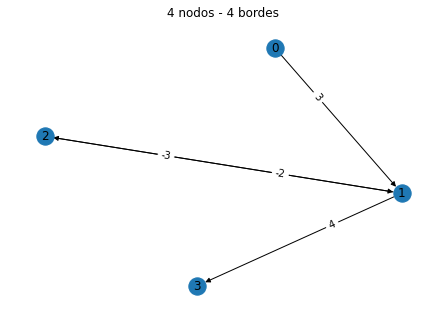

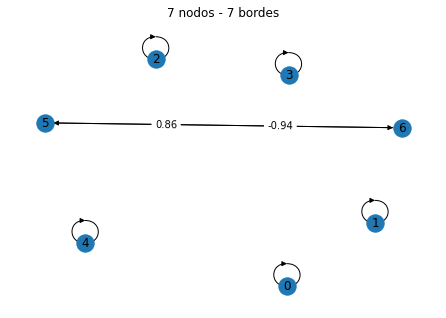

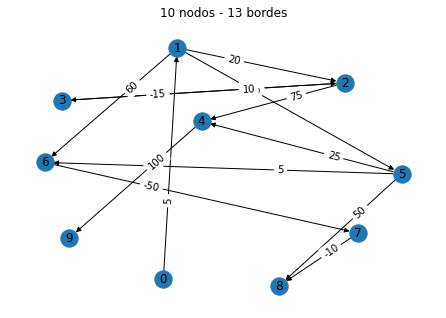

In [7]:
edges1 = [["0","1", 3],
         ["1","2", -2],
         ["2","1", -3],
         ["1","3", 4]]
     
G1 = nx.DiGraph()        
G1.add_weighted_edges_from(edges1)

plot_grapg(G1,'4 nodos - 4 bordes')

edges2 = [["5","6", 0.86],
         ["6","5", -0.94],
         ["3","3",0],
         ["0","0",0],
         ["1","1",0],
         ["2","2",0],
         ["4","4",0]]
        
G2 = nx.DiGraph()        
G2.add_weighted_edges_from(edges2)

plot_grapg(G2,'7 nodos - 7 bordes')

edges3 = [["0","1", 5],
         ["1","2", 20],
         ["1","5", 30],
         ["1","6", 60],
         ["2","3", 10],
         ["2","4", 75],
         ["3","2", -15],
         ["4","9", 100],
         ["5","4", 25],
         ["5","6", 5],
         ["5","8", 50],
         ["6","7", -50],
         ["7","8", -10]]
        
G3 = nx.DiGraph()        
G3.add_weighted_edges_from(edges3)

plot_grapg(G3,'10 nodos - 13 bordes')

In [8]:
graphs = dict({1:G1,2:G2,3:G3})
distances = [1,5,10,20,50,100]

In [9]:
aux = pd.DataFrame()
times = []
iters = []
nod = []
dist = []
g = []
sol = []
for graph in graphs.items():
    nodes = list(map(int,list(graph[1].nodes)))
    for node in nodes:
        for distance in distances:
            # Aplicando método Bellman ford modificado para monioreo de parámetros
            start_time = time.time()
            c,lv,p = bf_negative_cycle(graph[1], node, distance)
            time_exec = (time.time() - start_time)
            times.append(time_exec)
            iters.append(len(lv))
            dist.append(distance)
            sol.append(c)
        nod += len(distances) * [node]
    g += (len(distances) * len(nodes)) * [graph[0]]
aux['distance'] = pd.Series(dist)
aux['node'] = pd.Series(nod)
aux['time'] = pd.Series(times)
aux['iter'] = pd.Series(iters)
aux['graph'] = pd.Series(g)
aux['sol'] = pd.Series(sol)
aux['date'] = datetime.today().strftime('%Y-%m-%d %H:%M')
aux[['graph','node','sol','distance','iter','time','date']]

,graph,node,sol,distance,iter,time,date
0,1,0,"[2, 1, 2]",1,14,0.000230,2022-04-16 18:48
1,1,0,"[2, 1, 2]",5,15,0.000181,2022-04-16 18:48
2,1,0,"[2, 1, 2]",10,16,0.000175,2022-04-16 18:48
3,1,0,"[2, 1, 2]",20,16,0.000168,2022-04-16 18:48
4,1,0,"[2, 1, 2]",50,16,0.000168,2022-04-16 18:48
...,...,...,...,...,...,...,...
121,3,7,"[3, 2, 3]",5,23,0.000787,2022-04-16 18:48
122,3,7,"[3, 2, 3]",10,23,0.000860,2022-04-16 18:48
123,3,7,"[3, 2, 3]",20,23,0.000763,2022-04-16 18:48
124,3,7,"[3, 2, 3]",50,22,0.000500,2022-04-16 18:48


In [10]:
aux[['graph','node','sol','distance','iter','time','date']].to_csv('tabla_reporte.csv',index=False)